##### Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 

Note: 

1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -

● Get all Pokemons whose spawn rate is less than 5%

● Get all Pokemons that have less than 4 weaknesses

● Get all Pokemons that have no multipliers at all

● Get all Pokemons that do not have more than 2 evolutions

● Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

● Get all Pokemon who have more than two types of capabilities


In [25]:
import json
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_json('pokedex.json')

In [26]:
# Extract the 'pokemon' data attribute from the JSON
pokemon_data = data['pokemon']

In [27]:
pokemon_data[0]

{'id': 1,
 'num': '001',
 'name': 'Bulbasaur',
 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
 'type': ['Grass', 'Poison'],
 'height': '0.71 m',
 'weight': '6.9 kg',
 'candy': 'Bulbasaur Candy',
 'candy_count': 25,
 'egg': '2 km',
 'spawn_chance': 0.6900000000000001,
 'avg_spawns': 69,
 'spawn_time': '20:00',
 'multipliers': [1.58],
 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
 'next_evolution': [{'num': '002', 'name': 'Ivysaur'},
  {'num': '003', 'name': 'Venusaur'}]}

In [28]:
# Create an empty list to store the formatted data
formatted_data = []
    
# Iterate over each Pokemon
for pokemon in pokemon_data:
    
    pokemon_id = pokemon['id']
    pokemon_num = pokemon['num']
    pokemon_name = pokemon['name']
    pokemon_img = pokemon['img']
    pokemon_type = pokemon['type']
    pokemon_height = pokemon['height']
    pokemon_weight = pokemon['weight']
    pokemon_candy = pokemon['candy']
    #pokemon_candy_count = pokemon['candy_count']
    pokemon_egg = pokemon['egg']
    pokemon_spawn_chance = pokemon['spawn_chance']
    pokemon_avg_spawns = pokemon['avg_spawns']
    pokemon_spawn_time = pokemon['spawn_time']
    pokemon_multipliers = pokemon['multipliers']
    pokemon_weaknesses = pokemon['weaknesses']
    pokemon_next_evolution = pokemon.get('next_evolution', [])
    pokemon_prev_evolution = pokemon.get('prev_evolution', [])

# Append the formatted data to the list
    formatted_data.append({
            'id': pokemon_id,
            'num': pokemon_num,
            'name': pokemon_name,
            'img': pokemon_img,
            'type': pokemon_type,
            'height': pokemon_height,
            'weight': pokemon_weight,
            'candy': pokemon_candy,
            #'candy_count': pokemon_candy_count,
            'egg': pokemon_egg,
            'spawn_chance': pokemon_spawn_chance,
            'avg_spawns': pokemon_avg_spawns,
            'spawn_time': pokemon_spawn_time,
            'multipliers': pokemon_multipliers,
            'weaknesses': pokemon_weaknesses,
            'next_evolution': pokemon_next_evolution,
            'prev_evolution': pokemon_prev_evolution
        })
    


In [29]:
# Convert the formatted data to a Pandas DataFrame
df = pd.DataFrame(formatted_data)
    
# Save the DataFrame to Excel
df.to_excel('pokemon_data.xlsx', index=False)

In [30]:
df = pd.read_excel('pokemon_data.xlsx')

In [32]:
df.head(1)

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,2 km,0.69,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",[]


In [ ]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['spawn_chance'] < 0.05]
spawn_rate_less_than_5

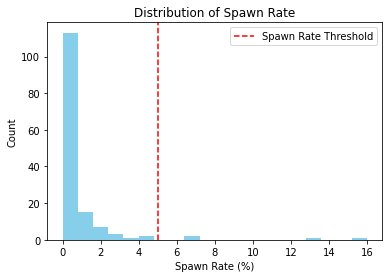

In [55]:
# Plotting the spawn rate distribution
plt.hist(df['spawn_chance'], bins=20, color='skyblue')
plt.axvline(x=5, color='red', linestyle='--', label='Spawn Rate Threshold')
plt.xlabel('Spawn Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Spawn Rate')
plt.legend()
plt.show()

In [56]:
## Get all Pokemons that have no multipliers at all
df[df['multipliers'].isnull()]

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_time_seconds
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Not in Eggs,0.0170,1.70,00:11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",690
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,Not in Eggs,0.0031,0.31,00:13:34,NaN,"['Water', 'Electric', 'Rock']",[],"[{'num': '004', 'name': 'Charmander'}, {'num':...",814
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Not in Eggs,0.0067,0.67,00:00:06,NaN,"['Electric', 'Grass']",[],"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",6
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"['Bug', 'Flying']",1.09 m,32.0 kg,Caterpie Candy,Not in Eggs,0.0220,2.20,00:05:23,NaN,"['Fire', 'Electric', 'Ice', 'Flying', 'Rock']",[],"[{'num': '010', 'name': 'Caterpie'}, {'num': '...",323
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"['Bug', 'Poison']",0.99 m,29.5 kg,Weedle Candy,Not in Eggs,0.0510,5.10,00:04:50,NaN,"['Fire', 'Flying', 'Psychic', 'Rock']",[],"[{'num': '013', 'name': 'Weedle'}, {'num': '01...",290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,139,139,Omastar,http://www.serebii.net/pokemongo/pokemon/139.png,"['Rock', 'Water']",0.99 m,35.0 kg,None,Omanyte Candy,0.0061,0.61,00:05:04,NaN,"['Electric', 'Grass', 'Fighting', 'Ground']",[],"[{'num': '138', 'name': 'Omanyte'}]",304
140,141,141,Kabutops,http://www.serebii.net/pokemongo/pokemon/141.png,"['Rock', 'Water']",1.30 m,40.5 kg,Kabuto Candy,Not in Eggs,0.0032,0.32,00:23:40,NaN,"['Electric', 'Grass', 'Fighting', 'Ground']",[],"[{'num': '140', 'name': 'Kabuto'}]",1420
141,142,142,Aerodactyl,http://www.serebii.net/pokemongo/pokemon/142.png,"['Rock', 'Flying']",1.80 m,59.0 kg,None,10 km,0.0180,1.80,00:23:40,NaN,"['Water', 'Electric', 'Ice', 'Rock', 'Steel']",[],[],1420
142,143,143,Snorlax,http://www.serebii.net/pokemongo/pokemon/143.png,['Normal'],2.11 m,460.0 kg,None,10 km,0.0160,1.60,00:23:40,NaN,['Fighting'],[],[],1420


In [14]:
# Get all Pokemons that do not have more than 2 evolutions
df[df['next_evolution'].apply(len) <= 2]


,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,Not in Eggs,0.0031,0.31,13:34,NaN,"['Water', 'Electric', 'Rock']",[],"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Not in Eggs,0.0067,0.67,00:06,NaN,"['Electric', 'Grass']",[],"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"['Bug', 'Flying']",1.09 m,32.0 kg,Caterpie Candy,Not in Eggs,0.0220,2.20,05:23,NaN,"['Fire', 'Electric', 'Ice', 'Flying', 'Rock']",[],"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"['Bug', 'Poison']",0.99 m,29.5 kg,Weedle Candy,Not in Eggs,0.0510,5.10,04:50,NaN,"['Fire', 'Flying', 'Psychic', 'Rock']",[],"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"['Electric', 'Flying']",1.60 m,52.6 kg,None,Not in Eggs,0.0000,0.00,NaN,NaN,"['Ice', 'Rock']",[],[]
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,Not in Eggs,0.0000,0.00,NaN,NaN,"['Water', 'Electric', 'Rock']",[],[]
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",[],"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",[],[]


In [16]:
# Get all Pokemons whose spawn time is less than 300 seconds


In [34]:
df['spawn_time']=pd.to_datetime(df['spawn_time'], format='%M:%S').dt.time

In [35]:
df['spawn_time']

0      00:20:00
1      00:07:00
2      00:11:30
3      00:08:45
4      00:19:00
         ...   
146    00:06:41
147    00:11:57
148    00:23:38
149         NaT
150         NaT
Name: spawn_time, Length: 151, dtype: object

In [39]:
df = df.dropna(subset=['spawn_time'])

In [44]:
df['spawn_time']

0      00:20:00
1      00:07:00
2      00:11:30
3      00:08:45
4      00:19:00
         ...   
141    00:23:40
142    00:23:40
146    00:06:41
147    00:11:57
148    00:23:38
Name: spawn_time, Length: 145, dtype: object

In [50]:
# Convert the 'spawn_time' column to timedelta format
df['spawn_time_seconds'] = df['spawn_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [51]:
df['spawn_time_seconds']

0      1200
1       420
2       690
3       525
4      1140
       ... 
141    1420
142    1420
146     401
147     717
148    1418
Name: spawn_time_seconds, Length: 145, dtype: int64

In [54]:
# Filter the DataFrame to get Pokemons with spawn time less than 300 seconds
filtered_df = df[df['spawn_time_seconds'] < 300]

# Display the filtered DataFrame
filtered_df


,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_time_seconds
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,2 km,0.5800,58.00,00:04:25,[2.1],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",[],265
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,Not in Eggs,0.0067,0.67,00:00:06,NaN,"['Electric', 'Grass']",[],"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",6
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,Not in Eggs,0.1870,18.70,00:02:11,"[3.55, 3.79]","['Fire', 'Flying', 'Rock']","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",131
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,2 km,7.1200,712.00,00:02:21,"[1.01, 1.09]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",[],141
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,Not in Eggs,0.4400,44.00,00:02:30,"[3.01, 3.41]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,['Normal'],1.40 m,88.4 kg,None,5 km,0.1200,12.00,00:00:37,NaN,['Fighting'],[],[],37
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"['Water', 'Flying']",6.50 m,235.0 kg,Magikarp Candy,Not in Eggs,0.0032,0.32,00:02:15,NaN,"['Electric', 'Rock']",[],"[{'num': '129', 'name': 'Magikarp'}]",135
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,['Electric'],0.79 m,24.5 kg,None,Not in Eggs,0.0120,1.20,00:02:30,NaN,['Ground'],[],"[{'num': '133', 'name': 'Eevee'}]",150
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,['Normal'],0.79 m,36.5 kg,None,5 km,0.0120,1.20,00:02:49,NaN,['Fighting'],[],[],169


In [ ]:
# ● Get all Pokemon who have more than two types of capabilities

In [58]:
# Count the number of types for each Pokémon
df['num_types'] = df['type'].apply(lambda x: len(x.split(',')))


In [59]:
# Filter the DataFrame to get Pokemons with more than two types
df2 = df[df['num_types'] > 2]


In [64]:
df2

,id,num,name,img,type,height,weight,candy,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_time_seconds,num_types
